<a href="https://colab.research.google.com/github/perses08/IMDB_classification-nlp-/blob/main/imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds
import numpy as np

In [2]:
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteQTPNC7/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteQTPNC7/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteQTPNC7/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [3]:
train = imdb['train']
test = imdb['test']

In [4]:
training_sentences = []
training_labels = []
test_sentences = []
test_labels = []

for i,j in train:
  training_sentences.append(i.numpy().decode('utf8'))
  training_labels.append(j.numpy())

for i,j in test:
  test_sentences.append(i.numpy().decode('utf8'))
  test_labels.append(j.numpy())

In [5]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(test_labels)

In [6]:
token = Tokenizer(10000,oov_token='<oov>')
token.fit_on_texts(training_sentences)
word_index = token.word_index

In [7]:
training_sequences = token.texts_to_sequences(training_sentences)
testing_sequences = token.texts_to_sequences(test_sentences)

In [8]:
np.array(training_sequences[1])

array([  11,   26,   75,  571,    6,  805, 2354,  313,  106,   19,   12,
          7,  629,  686,    6,    4, 2219,    5,  181,  584,   64, 1454,
        110, 2263,    3, 3951,   21,    2,    1,    3,  258,   41, 4677,
          4,  174,  188,   21,   12, 4078,   11, 1578, 2354,   86,    2,
         20,   14, 1907,    2,  112,  940,   14, 1811, 1340,  548,    3,
        355,  181,  466,    6,  591,   19,   17,   55, 1817,    5,   49,
         14, 4044,   96,   40,  136,   11,  972,   11,  201,   26, 1046,
        171,    5,    2,   20,   19,   11,  294,    2, 2155,    5,   10,
          3,  283,   41,  466,    6,  591,    5,   92,  203,    1,  207,
         99,  145, 4382,   16,  230,  332,   11, 2486,  384,   12,   20,
         31,   30])

In [9]:
training_sequences_final = pad_sequences(training_sequences, maxlen=120, truncating='post')
testing_sequences_final = pad_sequences(testing_sequences, maxlen=120, truncating='post')

In [10]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(10000,32,input_length=120),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(32,activation='relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')
])

In [11]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
history = model.fit(training_sequences_final,training_labels_final,epochs=20,validation_data=(testing_sequences_final,testing_labels_final),verbose=2)

Epoch 1/20
782/782 - 6s - loss: 0.4554 - accuracy: 0.7737 - val_loss: 0.3814 - val_accuracy: 0.8267
Epoch 2/20
782/782 - 6s - loss: 0.1582 - accuracy: 0.9437 - val_loss: 0.5069 - val_accuracy: 0.7998
Epoch 3/20
782/782 - 6s - loss: 0.0195 - accuracy: 0.9961 - val_loss: 0.6569 - val_accuracy: 0.8066
Epoch 4/20
782/782 - 6s - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.7338 - val_accuracy: 0.8080
Epoch 5/20
782/782 - 6s - loss: 5.2585e-04 - accuracy: 1.0000 - val_loss: 0.7788 - val_accuracy: 0.8102
Epoch 6/20
782/782 - 5s - loss: 2.6532e-04 - accuracy: 1.0000 - val_loss: 0.8210 - val_accuracy: 0.8096
Epoch 7/20
782/782 - 6s - loss: 1.4782e-04 - accuracy: 1.0000 - val_loss: 0.8574 - val_accuracy: 0.8106
Epoch 8/20
782/782 - 5s - loss: 8.8814e-05 - accuracy: 1.0000 - val_loss: 0.8889 - val_accuracy: 0.8116
Epoch 9/20
782/782 - 5s - loss: 5.4756e-05 - accuracy: 1.0000 - val_loss: 0.9237 - val_accuracy: 0.8112
Epoch 10/20
782/782 - 6s - loss: 3.4395e-05 - accuracy: 1.0000 - val_loss: 0.957

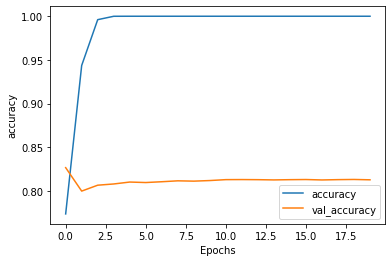

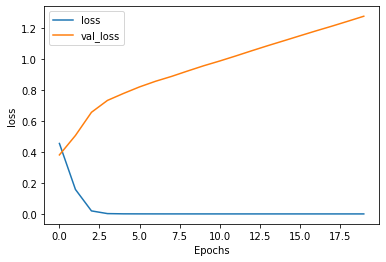

In [13]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")